In [62]:
import os
import csv
import json
import copy
import pandas
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load labels information

In [2]:
with open('/media/qimin/seagate5tb/coral/label_set.json', 'r') as f:
    labels = json.load(f)
labels = sorted(labels, key=lambda i: i['id'])

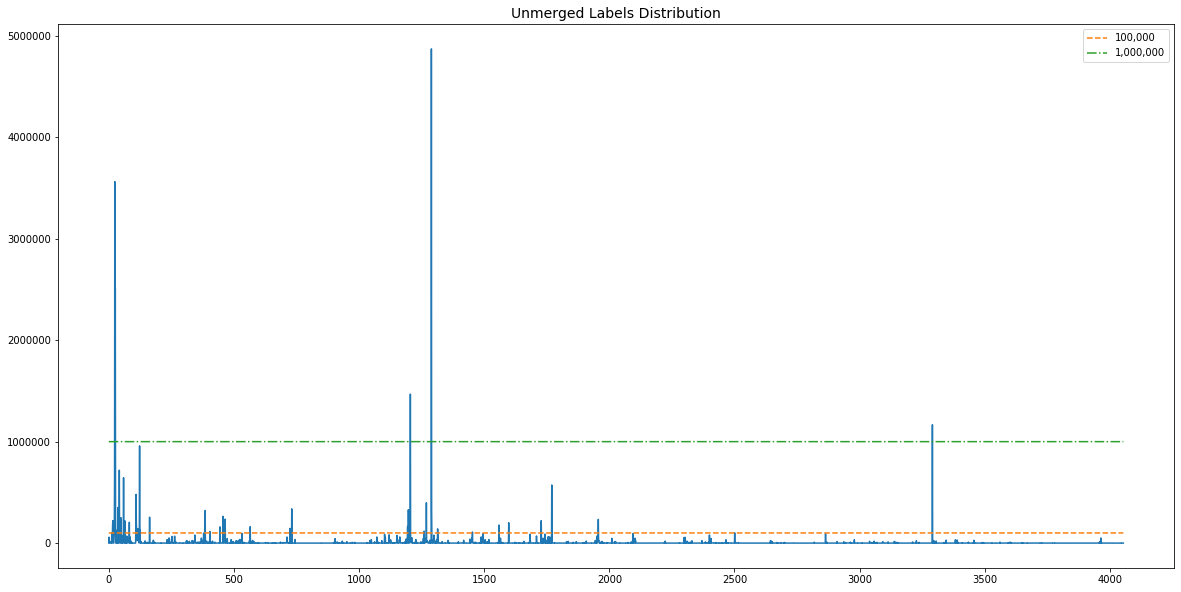

In [3]:
labels_ann_count = [i['ann_count'] for i in labels]
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(labels)), labels_ann_count)
plt.plot(np.arange(len(labels)), [100000]*len(labels), '--', label='100,000')
plt.plot(np.arange(len(labels)), [1000000]*len(labels), '-.', label='1,000,000')
plt.title('Unmerged Labels Distribution', fontsize=14)
plt.legend()

# Merge duplicated labels

In [5]:
merged_labels = copy.deepcopy(labels)
duplicated_labels = [i for i in labels if i['duplicate_of'] != 'None']
for i in duplicated_labels:
    for j in merged_labels:
        if j['name'] == i['duplicate_of']:
            j['ann_count'] += i['ann_count']
            merged_labels.remove(i)
            break

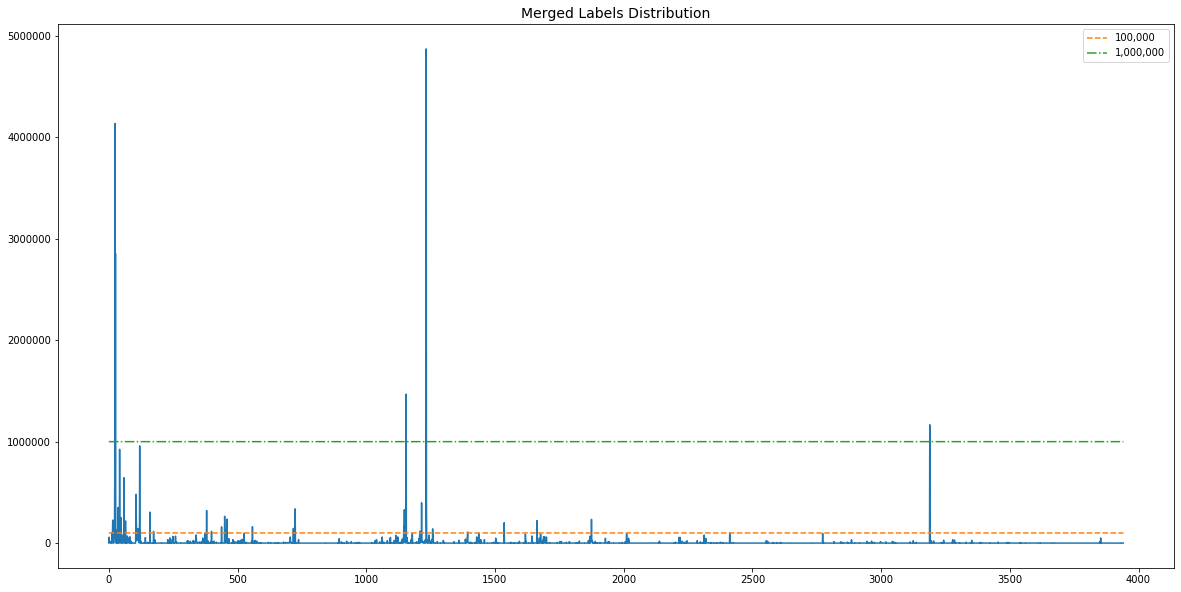

In [6]:
merged_labels_ann_count = [i['ann_count'] for i in merged_labels]
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(merged_labels)), merged_labels_ann_count)
plt.plot(np.arange(len(merged_labels)), [100000]*len(merged_labels), '--', label='100,000')
plt.plot(np.arange(len(merged_labels)), [1000000]*len(merged_labels), '-.', label='1,000,000')
plt.title('Merged Labels Distribution', fontsize=14)
plt.legend()

# Merged label distribution with annotation count less than 1,000,000

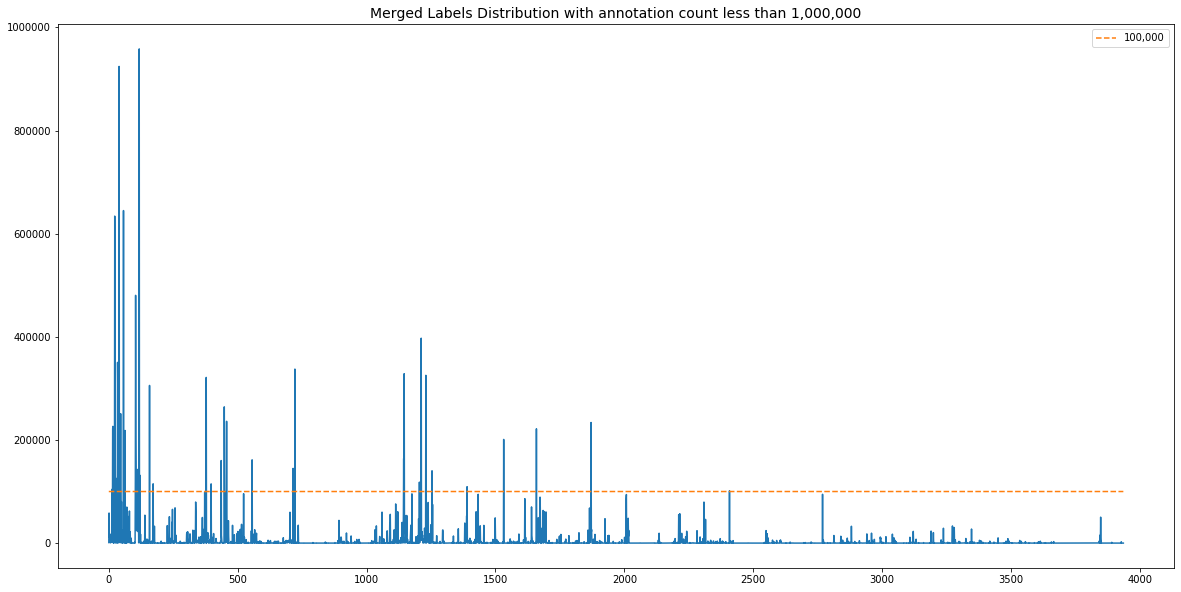

In [7]:
merged_labels_ann_count_lt_1m = [i['ann_count'] for i in merged_labels if i['ann_count'] < 1000000]
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(merged_labels_ann_count_lt_1m)), merged_labels_ann_count_lt_1m)
plt.plot(np.arange(len(merged_labels_ann_count_lt_1m)), 
         [100000]*len(merged_labels_ann_count_lt_1m), '--', label='100,000')
plt.title('Merged Labels Distribution with annotation count less than 1,000,000', fontsize=14)
plt.legend()

# Label distribution in different annotation count interval

In [171]:
def print_number_of_label(l, r):
    label = [i['ann_count'] for i in merged_labels if l <= i['ann_count'] < r]
    print("Number of labels with {} <= ann_count <= {}: {}".format(l, r, len(label)))
    
def plot_label_distribution(l, r):
    label = [i['ann_count'] for i in merged_labels if l <= i['ann_count'] < r]
    plt.figure(figsize=(8, 5))
    plt.hist(label, bins=int(r/l) if l !=0 else r, rwidth=0.8)
    plt.title('Total: {}'.format(len(label)))
    plt.xlabel('# of annotation count')
    plt.ylabel('# of labels')
    plt.show()

In [173]:
print_number_of_label(0, 100)
print_number_of_label(100, 1000)
print_number_of_label(100, 10000)
print_number_of_label(100, 100000)
print_number_of_label(100, 1000000)
print_number_of_label(100, 10000000)
print_number_of_label(1000, 10000000)

Number of labels with 0 <= ann_count <= 100: 2445
Number of labels with 100 <= ann_count <= 1000: 698
Number of labels with 100 <= ann_count <= 10000: 1203
Number of labels with 100 <= ann_count <= 100000: 1443
Number of labels with 100 <= ann_count <= 1000000: 1492
Number of labels with 100 <= ann_count <= 10000000: 1497
Number of labels with 1000 <= ann_count <= 10000000: 799


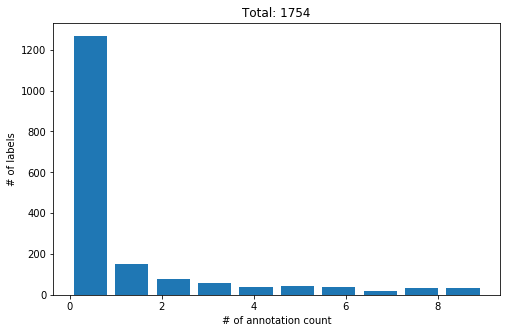

In [154]:
plot_label_distribution(0, 10)

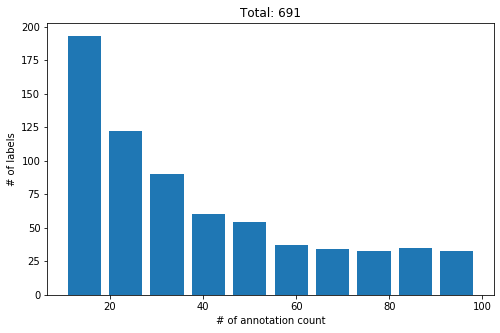

In [155]:
plot_label_distribution(10, 100)

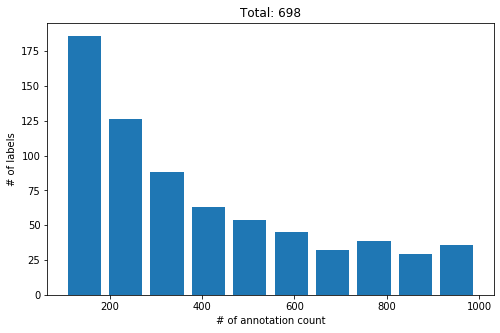

In [156]:
plot_label_distribution(100, 1000)

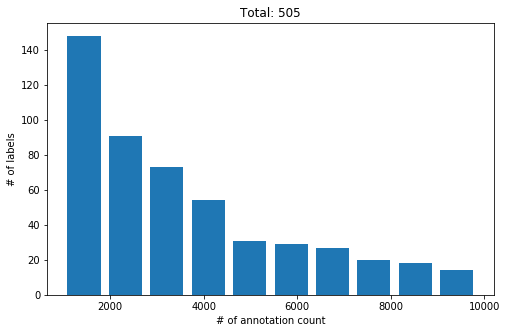

In [157]:
plot_label_distribution(1000, 10000)

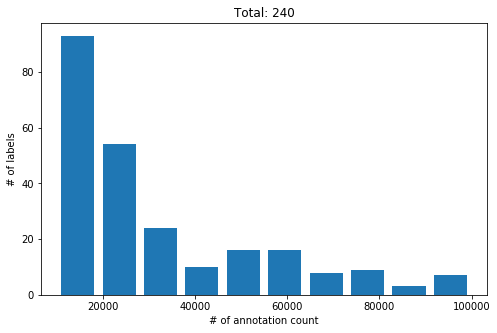

In [158]:
plot_label_distribution(10000, 100000)

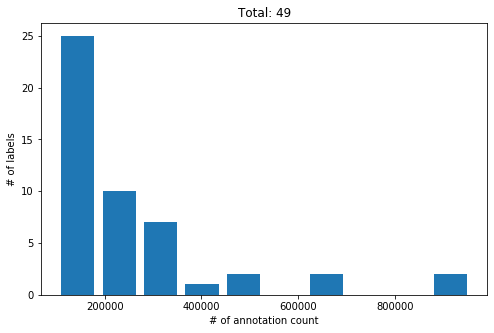

In [159]:
plot_label_distribution(100000, 1000000)

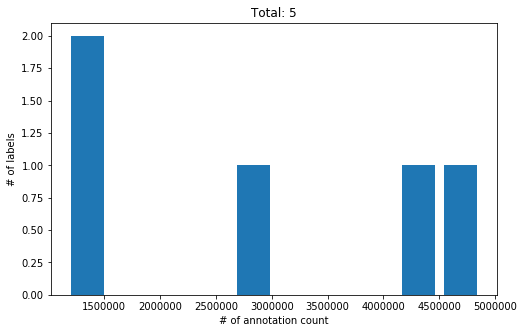

In [175]:
plot_label_distribution(1000000, 10000000)

# Write CSV files

In [ ]:
with open('meta_unmerged_labels.csv', 'a+', newline='') as cout:
    writer = csv.DictWriter(
        cout, fieldnames=['id', 'name', 'ann_count', 'duplicate_of']
    )
    writer.writeheader()
with open('meta_merged_labels.csv', 'a+', newline='') as cout:
    writer = csv.DictWriter(
        cout, fieldnames=['id', 'name', 'ann_count']
    )
    writer.writeheader()

In [9]:
meta_unmerged_labels = [[i['id'], i['name'], i['ann_count'], i['duplicate_of']] for i in labels]
meta_merged_labels = [[i['id'], i['name'], i['ann_count']] for i in merged_labels]

In [12]:
with open('meta_unmerged_labels.csv', 'a+') as csvin:
    writer = csv.writer(csvin)
    for i in meta_unmerged_labels:
        writer.writerow(i)
csvin.close()

In [13]:
with open('meta_merged_labels.csv', 'a+') as csvin:
    writer = csv.writer(csvin)
    for i in meta_merged_labels:
        writer.writerow(i)
csvin.close()